In [10]:
import pandas as pd

excel_file = "dataset.xlsx"

sheets = pd.read_excel(excel_file, sheet_name=None)


for sheet_name, data in sheets.items():
    csv_file_name = f"{sheet_name}"
    data.to_csv(csv_file_name, index=False)
    print(f"Saved {sheet_name} to {csv_file_name}")


Saved UserDetails.csv to UserDetails.csv
Saved CookingSessions.csv to CookingSessions.csv
Saved OrderDetails.csv to OrderDetails.csv


In [11]:
import pandas as pd
import numpy as np


user_details = pd.read_csv("UserDetails.csv")
cooking_sessions = pd.read_csv("CookingSessions.csv")
order_details = pd.read_csv("OrderDetails.csv")

order_details['Rating'] = order_details['Rating'].fillna(order_details['Rating'].median())
order_details = order_details[order_details['Order Status'] != 'Canceled']

user_details['Registration Date'] = pd.to_datetime(user_details['Registration Date'])
order_details['Order Date'] = pd.to_datetime(order_details['Order Date'])


user_details.drop_duplicates(inplace=True)
cooking_sessions.drop_duplicates(inplace=True)
order_details.drop_duplicates(inplace=True)


user_details.to_csv("cleaned_user_details.csv", index=False)
cooking_sessions.to_csv("cleaned_cooking_sessions.csv", index=False)
order_details.to_csv("cleaned_order_details.csv", index=False)


In [20]:
# Print all column names for each DataFrame
print("Columns in order_details:")
print(order_details.columns)

print("\nColumns in cooking_sessions:")
print(cooking_sessions.columns)

print("\nColumns in user_details:")
print(user_details.columns)


Columns in order_details:
Index(['order id', 'user id', 'order date', 'meal type', 'dish name',
       'order status', 'amount (usd)', 'time of day', 'rating', 'session id'],
      dtype='object')

Columns in cooking_sessions:
Index(['session id', 'user id', 'dish name', 'meal type', 'session start',
       'session end', 'duration (mins)', 'session rating'],
      dtype='object')

Columns in user_details:
Index(['user id', 'user name', 'age', 'location', 'registration date', 'phone',
       'email', 'favorite meal', 'total orders'],
      dtype='object')


In [23]:

merged_data = order_details.merge(
    cooking_sessions, on="user id", how="left"
).merge(user_details, on="user id", how="left")

# Save merged data
merged_data.to_csv("merged_data.csv", index=False)
print(merged_data)

    order id user id order date meal type_x      dish name_x order status  \
0       1001    U001 2024-12-01      Dinner        Spaghetti    Completed   
1       1001    U001 2024-12-01      Dinner        Spaghetti    Completed   
2       1001    U001 2024-12-01      Dinner        Spaghetti    Completed   
3       1002    U002 2024-12-01       Lunch     Caesar Salad    Completed   
4       1002    U002 2024-12-01       Lunch     Caesar Salad    Completed   
5       1002    U002 2024-12-01       Lunch     Caesar Salad    Completed   
6       1004    U001 2024-12-02   Breakfast         Pancakes    Completed   
7       1004    U001 2024-12-02   Breakfast         Pancakes    Completed   
8       1004    U001 2024-12-02   Breakfast         Pancakes    Completed   
9       1005    U004 2024-12-03       Lunch     Caesar Salad    Completed   
10      1005    U004 2024-12-03       Lunch     Caesar Salad    Completed   
11      1006    U002 2024-12-03      Dinner        Spaghetti    Completed   

In [26]:
popular_dishes = merged_data.groupby('dish name_x').size().sort_values(ascending=False)
print(popular_dishes)


dish name_x
Spaghetti          9
Caesar Salad       7
Grilled Chicken    6
Pancakes           6
Oatmeal            3
Veggie Burger      1
dtype: int64


In [29]:
revenue_by_meal = merged_data.groupby('meal type_x')['amount (usd)'].sum()
print(revenue_by_meal)


meal type_x
Breakfast     70.5
Dinner       202.0
Lunch         77.0
Name: amount (usd), dtype: float64


In [30]:
orders_by_location = merged_data.groupby('location').size().sort_values(ascending=False)
print(orders_by_location)


location
Los Angeles      9
New York         9
San Francisco    4
Seattle          4
Chicago          3
Austin           1
Boston           1
Miami            1
dtype: int64


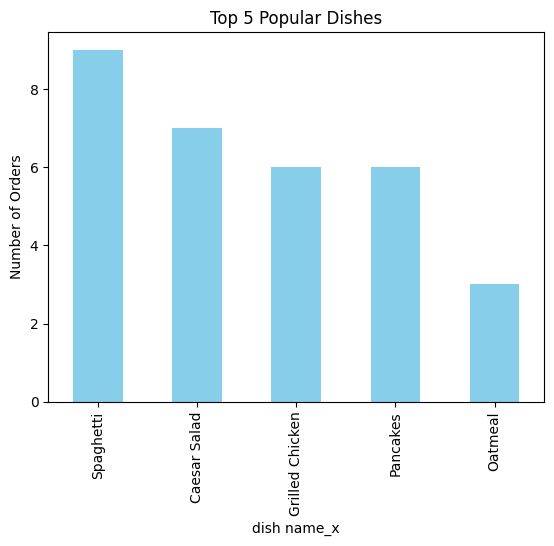

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

popular_dishes.head(5).plot(kind='bar', color='skyblue', title='Top 5 Popular Dishes')
plt.ylabel('Number of Orders')
plt.show()


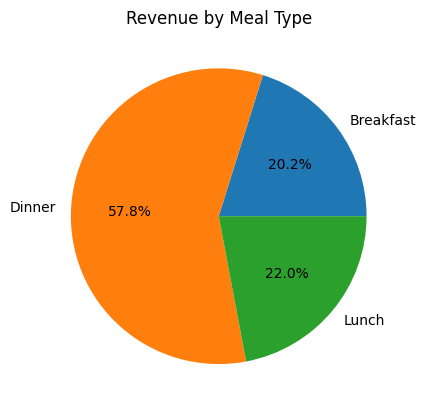

In [33]:
revenue_by_meal.plot(kind='pie', autopct='%1.1f%%', title='Revenue by Meal Type')
plt.ylabel('')
plt.show()


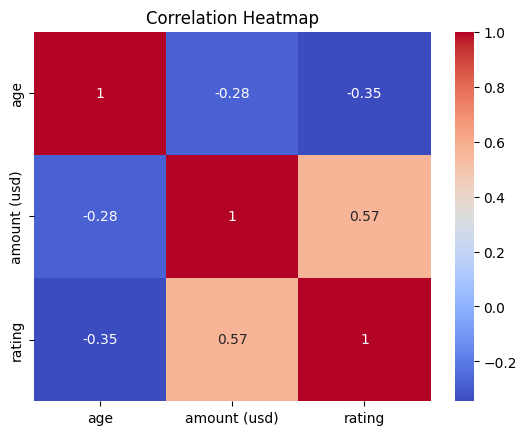

In [35]:
correlation = merged_data[['age', 'amount (usd)', 'rating']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [39]:
from fpdf import FPDF

# Create PDF
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Business Recommendations Report', align='C', ln=True)

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, f'Page {self.page_no()}', align='C')

pdf = PDF()
pdf.add_page()
pdf.set_font('Arial', '', 12)

recommendations = [
    "1. Promote Spaghetti as it is the most popular dish.",
    "2. Focus marketing efforts on Dinner as it generates the highest revenue.",
    "3. Target users in New York and Los Angeles as they have the highest order volume.",
    "4. Offer discounts to attract younger users (ages 25-35).",
    "5. Increase cooking session engagement by correlating with popular dishes."
]

for line in recommendations:
    pdf.cell(0, 10, line, ln=True)

pdf.output("Business_Recommendations.pdf")


''